## Recursão

O uso da recursão é útil na resolução de problemas que podem ser decompostos em subproblemas mais simples e onde a solução final obtém-se pela composição das soluções desses subproblemas. Para aplicar soluções recursivas é necessário: 

+ existir um conjunto de um ou mais casos triviais que não precisam de nenhuma computação suplementar – denominado **caso base** ou **base da recursão**, 

+ ser possível decompor o problema em subproblemas no qual pode ser construída a solução final – denomina-se esta decomposição por **passo da recursão** e 

+ os subproblemas chegam inevitavelmente ao caso base.

A estrutura de um programa recursivo é a seguinte:

    problema(P):
      se o caso base B responde a P
        devolver B
      senão
        decompor P em P1, ..., Pn
        R1 = problema(P1)
          ...
        Rn = problema(Pn)
        R = construir resposta com R1, ..., Rn 
        devolver R 

A esta técnica de decomposição de um problema em subproblemas relacionados também se designa por **dividir para conquistar** (do inglês, _divide and conquer_).

Os subproblemas têm de receber a informação necessária para a resolução e têm de devolver informação suficiente para a construção da resposta global. Se a decomposição dos subproblemas nunca chegar ao caso base, a recursão não tem forma de parar. É uma **recursão infinita** e o programa terminará eventualmente por falta de recursos de memória.


### Factorial

A função factorial é o 'Hello World' dos exemplos recursivos.

É possível definir o factorial de forma recursiva, que corresponde à estrutura da função Python:

$$ \text{factorial}(n) =
  \begin{cases} 
      \hfill 1                              \hfill & \text{ $n=0$} \\
      \hfill n \times \text{factorial}(n-1) \hfill & \text{ $n \gt 0$} \\
  \end{cases}$$

In [19]:
def fact(n):
    """pre: int n >= 0
    Returns n!"""
    if n == 0:
        return 1
    else:
        return n*fact(n - 1)

In [20]:
for i in range(10):
    print fact(i),

1 1 2 6 24 120 720 5040 40320 362880


### Fibonacci

A [sequência de Fibonacci](https://pt.wikipedia.org/wiki/Sequ%C3%AAncia_de_Fibonacci) é dada pela seguinte definição:

$$ \text{fib}(n) =
  \begin{cases} 
      \hfill 1                              \hfill & \text{ $n = 0 \vee n = 1$} \\
      \hfill \text{fib}(n-1) + \text{fib}(n-2) \hfill & \text{ $n \gt 1$} \\
  \end{cases}$$

A seguinte implementação recursiva espelha a definição:

In [21]:
def fib(n):
    """pre: int n >= 0
    Exponential version
    Returns Fibonacci of n"""
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [22]:
for i in range(25):
    print fib(i),

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025


Mas, este método tem um problema grave. Quando num método existe apenas uma invocação a si próprio (como no caso do factorial) diz-se uma **recursão linear**. Quando o método invoca se duas ou mais vezes (como no caso da função de Fibonacci) trata-se de uma **recursão não linear**. Se uma recursão não-linear invocar um método, com os mesmos argumentos, mais do que uma vez, a resolução do problema pode ser ineficiente. De facto, se se tentar invocar a função para um número grande (maior que 50, por exemplo) o tempo pode ser de horas, dias, ou mesmo mais lento.

Uma alternativa recursiva é usar a técnica da **memorização** (_memoization_) que basicamente o que faz é guardar as soluções encontradas para evitar invocações repetidas.

A próxima implementação usa memorização. Como funciona? É criado uma lista de soluções inicialmente quase toda com valores desconhecidos (usamos a constante <code>UNKNOWN</code> para representar ausência de solução) estando apenas preenchida as primeiras posições que correspondem aos casos base da recursão, <code>fib(0)</code> e <code>fib(1)</code>. Quando é pedido um novo valor, o progama verifica se conhece a solução e só em caso negativo é que a calcula.

In [42]:
def fibMem(n):
    """pre: int n >= 0
    Linear version using memoization, ie, save all solutions to avoid doing things twice
    Returns Fibonacci of n"""
    
    UNKNOWN = -1
    sols = [1,1] + [UNKNOWN]*(n-1)  # solution array (initially we only know the base cases)
    
    def fibMemR(n):
        if sols[n] == UNKNOWN:                    # if already known, no need to recompute it
            sols[n] = fibMemR(n-1) + fibMemR(n-2) # save the solution for future needs
        return sols[n]
    
    return fibMemR(n)    

In [24]:
for i in range(25):
    print fibMem(i),

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025


Vamos comparar o desempenho das duas soluções. Para cada um dos primeiros valores, vamos guardar o tempo de execução de <code>fib</code> e <code>fibMem</code>. Para isso utilizamos a biblioteca <code>time</code>.

In [45]:
import time

n = 25

times = [0]*n
for i in range(n):
    start_time = time.clock()
    fib(i)
    times[i] = time.clock() - start_time
    
timesMem = [0]*n
for i in range(n):
    start_time = time.clock()
    fibMem(i)
    timesMem[i] = time.clock() - start_time 

E agora fazemos um plot para verificar como cada função se comporta à medida que o valor de _n_ aumenta. Reparem também no eixo vertical dos dois gráficos para comparar o tempo que demorou a executar cada invocação de cada função:

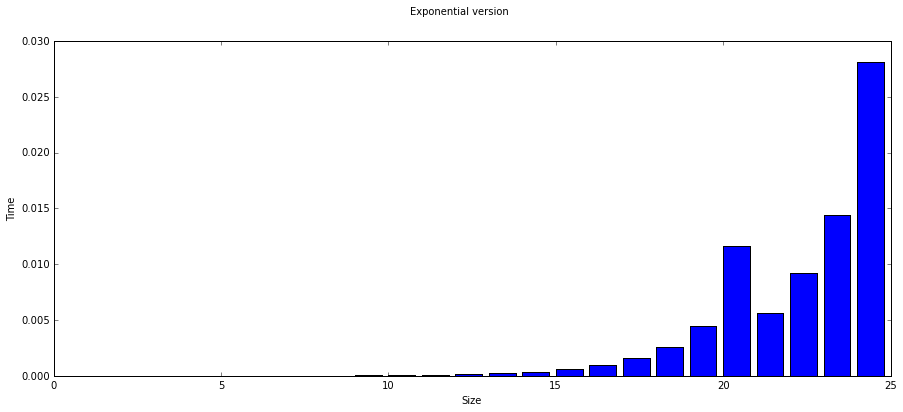

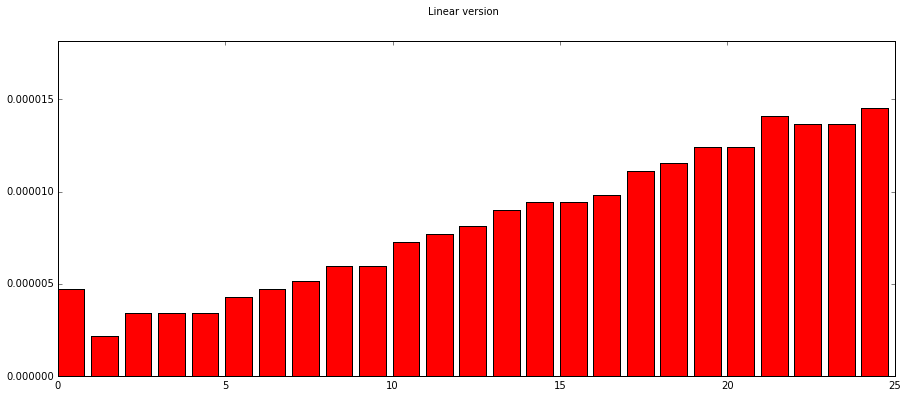

In [46]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6)) 
plt.bar(np.arange(n), times)
plt.suptitle('Exponential version')
plt.xlabel('Size')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(15,6)) 
plt.bar(np.arange(n), timesMem, color='r')
plt.suptitle('Linear version')
axes = plt.gca()
axes.set_ylim([0,max(timesMem)*1.25])
plt.show()

Facilmente se observa que a primeira versão tem um crescimento muito acentuado para valores crescentes de _n_. Já a segunda versão é mais robusta tendo o tempo de execução crescido linearmente. 

Se compararmos o tempo que demorou <code>fib(25)</code> e <code>fibMem(25)</code>:

In [27]:
print times[24], "segundos para fib(25)"
print timesMem[24], "segundos para fibMem(25)"
print "fibMem() foi %1.0fx mais rápido que fib()" % (times[24]/timesMem[24])

0.0228030301411 segundos para fib(25)
1.45392034483e-05 segundos para fibMem(25)
fibMem() foi 1568x mais rápido que fib()


### Exercícios

1) Considere a seguinte função recursiva:

In [2]:
def recursiva(n):
    if n == 0:
        return n
    else:
        return n + recursiva(n-1)  

6 15


a) Qual o valor de recursiva(3)? E de recursiva (5)?

In [4]:
print recursiva(3), recursiva(5)  

6 15


b) O que faz esta função?

Calcula o valor do somatório $\sum_{i=0}^n n$

c) O que caracteriza uma função recursiva?

A função invocar-se a si mesma. Uma função recursiva deve igualmente invocar-se com argumentos que se aproximam progressivamente das bases de recursão.

d) Escreva uma função iterativa que faça o mesmo que a função recursiva.

In [9]:
def iterativa(n):
    return sum(range(n+1))

In [11]:
print iterativa(3), iterativa(5)

6 15


4) Considere a seguinte função que calcula, de forma recursiva, a divisão de um
número n por 2, calculando para isso o número de vezes que se consegue subtrair
2 a n.

In [13]:
def div2(n):
    if (n == 0):
        return 0
    else:
        return 1 + div2(n - 2)

a) Simule as seguintes chamadas à função div2:

    div2(16)
    div2(6)
    div2(7)

In [4]:
def div2Verbose(n):
    if (n > - 100):
        print n, 
    elif (n > -102):
        print "..."
        return 0
    if (n == 0):
        return 0
    else:
        return 1 + div2Verbose(n - 2)
                        
div2Verbose(16)
print "\n"
div2Verbose(6)
print "\n"
div2Verbose(7)                        

16 14 12 10 8 6 4 2 0 

6 4 2 0 

7 5 3 1 -1 -3 -5 -7 -9 -11 -13 -15 -17 -19 -21 -23 -25 -27 -29 -31 -33 -35 -37 -39 -41 -43 -45 -47 -49 -51 -53 -55 -57 -59 -61 -63 -65 -67 -69 -71 -73 -75 -77 -79 -81 -83 -85 -87 -89 -91 -93 -95 -97 -99 ...


54

b) Corrija o caso base de forma a evitar o problema encontrado na alínea anterior.

In [7]:
def div2(n):
    if (n <= 1):
        return 0
    else:
        return 1 + div2(n - 2)
    
print div2(16)
print div2(6)
print div2(7)    

8
3
3


### More Exercises

Recursion in a text function

In [28]:
def isPalindrome(s):
    """Assumes s is a str
    Returns True if the letters in s form a palindrome;
    False otherwise. Non-letters and capitalization are ignored."""
    
    def toChars(s):
        s = s.lower()
        letters = ''
        for c in s:
            if c in 'abcdefghijklmnopqrstuvwxyz':
                letters = letters + c
        return letters
    
    def isPal(s):
        if len(s) <= 1:
            return True
        else:
            return s[0] == s[-1] and isPal(s[1:-1])
    
    return isPal(toChars(s))

In [29]:
print isPalindrome('Deliver desserts - demanded Nemesis - emended, named, stressed, reviled.')
print isPalindrome('This is surely not a palindrome')

True
False


5) Euclide's greatest common divider

In [8]:
# from the std library (iterative version)
def gcd(a, b):
    """Calculate the Greatest Common Divisor of a and b.

    Unless b==0, the result will have the same sign as b (so that when
    b is divided by it, the result comes out positive).
    """
    while b:
        a, b = b, a%b
    return a

print gcd(2016,192)

96


a) Implemente o algoritmo de Euclides de forma recursiva.

In [11]:
# recursive version:

def gcdRec(a, b):
    if b == 0:
        return a

    return gcdRec(b, a%b)

print gcdR(2016,192)

96


b) Simule a execução de mdc(4,2) e de mdc(66,42).

In [20]:
def gcdRecVerbose(a, b):
    print "(a = %2d, b = %2d)\n" % (a, b)
    if b == 0:
        return a

    return gcdRecVerbose(b, a%b)

gcdRecVerbose(4,2)
gcdRecVerbose(66,42)

(a =  4, b =  2)

(a =  2, b =  0)

(a = 66, b = 42)

(a = 42, b = 24)

(a = 24, b = 18)

(a = 18, b =  6)

(a =  6, b =  0)



6

7) Considere as seguintes funções e exemplos de uso:

In [21]:
def f1(n):
    if n == 0:
        return 0
    else:
        return n + f1(n - 1)
    
def f2(n, result):
    if n == 0:
        return result
    else:
        return f2(n - 1, n + result)
        
print(f1(3))
print(f2(3, 0))

6
6


a) Simule a execução das duas últimas linhas do programa apresentado.

In [22]:
def f2Verbose(n, result):
    print "(a = %2d, b = %2d)\n" % (n, result)
    if n == 0:
        return result
    else:
        return f2Verbose(n - 1, n + result)
    
print f2Verbose(3, 0)

(a =  3, b =  0)

(a =  2, b =  3)

(a =  1, b =  5)

(a =  0, b =  6)

6


b) O que é tail-recursion? Qual das duas funções (f1 ou f2) aplica tail-recursion?

Uma função f é tail-recursiva quando a sua última instrução é a chamada recursiva. Apenas a f2 é tail-recursive.

### Problemas

1) Escreva uma função que calcule o produto de dois inteiros positivos de forma recursiva:

In [29]:
def produtoRec(a, b):
    if b==1:
        return a
    else:
        return a + produtoRec(a, b-1)
    
produtoRec(11,10)

110

In [32]:
print int(True)

1


5) Escreva uma função que lide com potências de expoente inteiro (positivo, zero e negativo).

In [34]:
# just positives

def potRecLog(a, b):
    if b==0:
        return 1
    else:
        result = potRecLog(a, int(b/2))
        result = result * result
        if b % 2 == 1:
            result *= a
        return result
    
print potRecLog(2,4), potRecLog(2,5)

16 32


In [49]:
def potRecLog(a, b):
    if b==0:
        return 1
    elif b==-1:
        return 1.0/a
    else:
        result = potRecLog(a, int(b/2))
        result = result * result
        if b % 2 == 1:
            result *= a
        return result
    
print potRecLog(2,-2), potRecLog(2,-5)

0.25 0.03125


0.03125

### Other Egs

Finding Maximum recursively

In [30]:
def maxR(xs):
    """Assumes a non-empty list of ints"""
    if len(xs)==1:
        return xs[0]

    maxTail = maxR(xs[1:])                        # find max of remaining list, recursively
    return xs[0] if xs[0] > maxTail else maxTail

In [31]:
import random

L3 = [int(100*random.random()) for i in range(20)]  # list of 20 random numbers between [0,99]
print L3
print maxR(L3)

[67, 98, 54, 25, 57, 30, 44, 4, 19, 71, 91, 22, 61, 32, 61, 38, 83, 74, 96, 38]
98


Hanoi Towers, check [ref](https://en.wikipedia.org/wiki/Tower_of_Hanoi) for description and rules

In [35]:
def hanoi(n):
    
    def hanoiR(n, origin, destination, temp):
        if n==1:
            print "move disk 1 : ", origin, "->", destination
        else:
            hanoiR(n-1, origin, temp, destination)
            print "move disk", n, ": ", origin, "->", destination
            hanoiR(n-1, temp, destination, origin)
    
    hanoiR(n, "A", "C", "B")

In [36]:
hanoi(4)

move disk 1 :  A -> B
move disk 2 :  A -> C
move disk 1 :  B -> C
move disk 3 :  A -> B
move disk 1 :  C -> A
move disk 2 :  C -> B
move disk 1 :  A -> B
move disk 4 :  A -> C
move disk 1 :  B -> C
move disk 2 :  B -> A
move disk 1 :  C -> A
move disk 3 :  B -> C
move disk 1 :  A -> B
move disk 2 :  A -> C
move disk 1 :  B -> C


Permutations, [ref](http://stackoverflow.com/questions/104420/how-to-generate-all-permutations-of-a-list-in-python)

In [37]:
def permutations(head, tail=''):
    if len(head) == 0: 
        print tail,
    else:
        for i in range(len(head)):
            permutations(head[0:i] + head[i+1:], tail+head[i])

In [38]:
permutations('*abc')

*abc *acb *bac *bca *cab *cba a*bc a*cb ab*c abc* ac*b acb* b*ac b*ca ba*c bac* bc*a bca* c*ab c*ba ca*b cab* cb*a cba*
